In [58]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn.utils
import numpy as np
from sklearn import metrics
from sklearn.pipeline import Pipeline
from time import time 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import sklearn.datasets as skd


categories = ['alt.atheism', 'comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware', 
              'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos',
              'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
              'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns'
              , 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

train = skd.load_files('/content/drive/MyDrive/SingularitySystems/data/train', categories= categories, encoding= 'ISO-8859-1')
test = skd.load_files('/content/drive/MyDrive/SingularitySystems/data/test/',categories= categories, encoding= 'ISO-8859-1')        

# Exploring the data

In [64]:
train.filenames

array(['/content/drive/MyDrive/SingularitySystems/data/train/misc.forsale/76041',
       '/content/drive/MyDrive/SingularitySystems/data/train/comp.graphics/38337',
       '/content/drive/MyDrive/SingularitySystems/data/train/talk.religion.misc/83454',
       ...,
       '/content/drive/MyDrive/SingularitySystems/data/train/talk.politics.mideast/76020',
       '/content/drive/MyDrive/SingularitySystems/data/train/talk.religion.misc/83498',
       '/content/drive/MyDrive/SingularitySystems/data/train/comp.sys.mac.hardware/51857'],
      dtype='<U83')

In [65]:
train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [66]:
train.target

array([ 6,  1, 19, ..., 17, 19,  4])

In [76]:
print('Training data size:', len(train['data']))

Training data size: 11084


In [77]:
print('Training data size:', len(test['data']))

Training data size: 7761


In [78]:
targets, frequency = np.unique(train.target, return_counts=True)
targets, frequency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 585, 591, 590, 578, 593, 585, 593, 598, 597, 172, 595, 591,
        792, 593, 599, 546, 564, 465, 377]))

In [80]:
targets_str = np.array(train.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 585), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 593), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 172), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 792), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


In [6]:
train

{'DESCR': None,
 'data': ["From: mcadams@trane.rtp.dg.com (Ed McAdams)\nSubject: Piano, free to charity\nOrganization: Data General Corporation, Research Triangle Park, NC\nLines: 15\n\nI have one of those HEAVY antique upright pianos I would like to\ncontribute to any charity with muscle enough to get it out of my house.\n\nIf I get no response from a charity I will sell to for $100, you haul.\n\nIt is in good shape, needs tuning.  I'm in south Durham county.\n\nEd McAdams\nData General Corporation            mcadams@dg-rtp.dg.com\n62 T. W. Alexander Drive            {backbone}!mcnc!rti!dg-rtp!mcadams\nResearch Triangle Park, NC 27709    (919) 248-6369\nEd McAdams\nData General Corporation            mcadams@dg-rtp.dg.com\n62 T. W. Alexander Drive            {backbone}!mcnc!rti!dg-rtp!mcadams\nResearch Triangle Park, NC 27709    (919) 248-6369\n",
  "From: greg@cs.uct.ac.za (Gregory Torrance)\nSubject: Automatic layout of state diagrams\nOrganization: Computer Science Department, Univ

In [56]:
test

{'DESCR': None,
 'data': ["From: etxonss@ufsa.ericsson.se (Staffan Axelsson)\nSubject: WC 93: Results, April 22\nNntp-Posting-Host: uipc104.ericsson.se\nOrganization: Ericsson Telecom, Stockholm, Sweden\nLines: 109\n\n\n 1993 World Championships in Germany:\n ====================================\n\n Group A results:\n\n RUSSIA - SWITZERLAND  6-0 (2-0,1-0,3-0)\n\n 1st: RUS 1-0  Alexei Yashin 1          5:23\n      RUS 2-0  Alexei Yashin 2         16:45\n 2nd: RUS 3-0  Ilia Biakin 1            7:13\n 3rd: RUS 4-0  Andrei Khomutov 3        3:47\n      RUS 5-0  Ilia Biakin 2            4:13\n      RUS 6-0  Sergei Sorokin 1        13:50\n\n Penalties: RUS 7*2min 1*5min game penalty, SWI 9*2min\n Referee: Rob Hearn, USA\n Attendance: 3,500\n\n- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n\n CANADA - AUSTRIA  11-0 (6-0,2-0,3-0)\n\n 1st: CAN  1-0  Shayne Corson 1         9:51\n      CAN  2-0  Rod Brind'Amour 2      10:24\n      CAN  3-0  Paul Kariya 1        

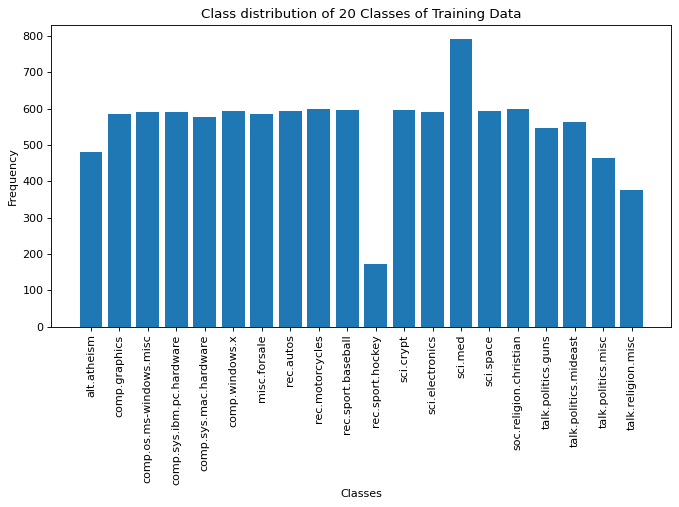

In [88]:

# Training data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='m')
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Classes of Training Data')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [90]:
targets_test, frequency_test = np.unique(test.target, return_counts=True)
targets_test_str = np.array(test.target_names)
print(list(zip(targets_test_str, frequency_test)))

[('alt.atheism', 319), ('comp.graphics', 389), ('comp.os.ms-windows.misc', 394), ('comp.sys.ibm.pc.hardware', 392), ('comp.sys.mac.hardware', 385), ('comp.windows.x', 395), ('misc.forsale', 390), ('rec.autos', 395), ('rec.motorcycles', 398), ('rec.sport.baseball', 397), ('rec.sport.hockey', 827), ('sci.crypt', 396), ('sci.electronics', 393), ('sci.med', 198), ('sci.space', 394), ('soc.religion.christian', 398), ('talk.politics.guns', 364), ('talk.politics.mideast', 376), ('talk.politics.misc', 310), ('talk.religion.misc', 251)]


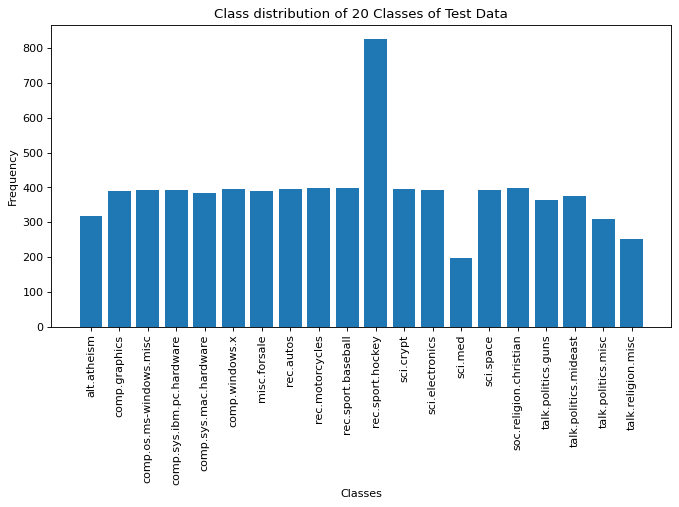

In [91]:

# Testing data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_test_str,frequency_test)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Classes of Test Data')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [69]:
print(train.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [8]:
print(train.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


# Preprocessing

In [10]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [11]:
#Removing Unnecessary Stuff from text

# HTML tag
def clean_tag (text):
    return re.sub(r'<.*?>', '', text)

# URL
def clean_url (text):
    return re.sub(r'http\S+', '', text)

# special characters
def clean_special_character (text):
    return re.sub('[^a-zA-Z]', ' ', text)

# upper case characters
def clean_uppercase (text):
    return str(text).lower()

# sentence seqmentation
def sent_tokenization (text):
    return sent_tokenize(text)

# tokenization
def tokenization (text):
    return word_tokenize(text)

# stop words
def clean_stop_word (tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

# steamming
def steam (tokens):
    return [PorterStemmer().stem(token) for token in tokens]

#lenmatization
def lenmatization (tokens):
    return [WordNetLemmatizer().lemmatize(word=token, pos='v') for token in tokens]

#convert back to string
def convert_2_string (text):
    return ' '.join(text)

In [12]:
#applying all cleaner
def clean (text):
    res = clean_url(text)
    res = clean_special_character(res)
    res = clean_uppercase(res)
    res = tokenization(res)
    res = clean_stop_word(res)
    res = clean_length(res)
    return convert_2_string(res)

In [14]:
#example
Sample = train.data[17]
afterclean = clean(Sample)
print(Sample, afterclean)

From: jake@bony1.bony.com (Jake Livni)
Subject: Re: was:Go Hezbollah!
Organization: The Department of Redundancy Department
Lines: 23

In article <1993Apr19.192207.413@ncsu.edu> hernlem@chess.ncsu.edu (Brad Hernlem) writes:

>I think that you should try to find more sources of news about what goes on
>in Lebanon and try to see through the propaganda. 

Thank you, Brad/Ali, for warning us about the dangers of propaganda.
It's funny, though, coming from you.

>There are no a priori
>black and white hats but one sure wonders how the IDF can bombard villages in 
>retaliation to pin-point attacks on its soldiers in Lebanon and then call the
>Lebanese terrorists.

Who is it that executes these "pin-point attacks" on Israelis?  The
guys in the white hats or the ones in the black hats?  Neither?  You
mean that they are just civilians, farmers, teachers, school children?
Well, maybe they ARE terrorists, after all?  And maybe that
"propaganda" was correct, too?  Hmm?

-- 
Jake Livni  jake@bony1.

## Preprocessing training and testing data

In [15]:
processed_train_data = [clean(letter) for letter in train.data]
processed_test_data = [clean(letter) for letter in test.data]

# Feature Extraction

## Bag of Words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()
analyze = count_vector.build_analyzer()

In [75]:
print(analyze(train.data[17]))

['from', 'jake', 'bony1', 'bony', 'com', 'jake', 'livni', 'subject', 're', 'was', 'go', 'hezbollah', 'organization', 'the', 'department', 'of', 'redundancy', 'department', 'lines', '23', 'in', 'article', '1993apr19', '192207', '413', 'ncsu', 'edu', 'hernlem', 'chess', 'ncsu', 'edu', 'brad', 'hernlem', 'writes', 'think', 'that', 'you', 'should', 'try', 'to', 'find', 'more', 'sources', 'of', 'news', 'about', 'what', 'goes', 'on', 'in', 'lebanon', 'and', 'try', 'to', 'see', 'through', 'the', 'propaganda', 'thank', 'you', 'brad', 'ali', 'for', 'warning', 'us', 'about', 'the', 'dangers', 'of', 'propaganda', 'it', 'funny', 'though', 'coming', 'from', 'you', 'there', 'are', 'no', 'priori', 'black', 'and', 'white', 'hats', 'but', 'one', 'sure', 'wonders', 'how', 'the', 'idf', 'can', 'bombard', 'villages', 'in', 'retaliation', 'to', 'pin', 'point', 'attacks', 'on', 'its', 'soldiers', 'in', 'lebanon', 'and', 'then', 'call', 'the', 'lebanese', 'terrorists', 'who', 'is', 'it', 'that', 'executes', 

In [18]:
X_train_counts = count_vector.fit_transform(train.data)
X_train_counts.shape

(11084, 129254)

## TF - Term Frequency, TF–TDF - Term Frequency times Inverse Document Frequency

### TF

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tf_transformer = TfidfTransformer(use_idf=False)
tf_transformer.fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(11084, 129254)

In [22]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11084, 129254)

## Use TF-IDF for Feature Extractions

In [23]:
vectorizer = TfidfVectorizer(max_df = 0.75, ngram_range=(1,2))
train_features = vectorizer.fit_transform(processed_train_data)
test_features = vectorizer.transform(processed_test_data)

# Training a classifier 

In [35]:
# space to store all model evaluation
reports = []

# Confusion Matrix
def draw_confusion_matrix(target, predicted, target_names = test.target_names, normalize = None, clf_name = 'Classifier'):
    cm = metrics.confusion_matrix(target, predicted, normalize = normalize)
    df_cm = pd.DataFrame(cm, index = [i for i in target_names],
                      columns = target_names)
    plt.figure(figsize = (10,10))
    sns.heatmap(df_cm, annot=True, fmt = ".2f")
    plt.title(clf_name)
    plt.xlabel("Predicted Label")
    plt.ylabel("True label")
    plt.show()

In [36]:
# Report of model performance and visualizing the result.

def Basis(grid_search, clf_name, X_train = train_features, y_train = train.target, X_test = test_features, y_test = test.target, vectorizer = vectorizer, ensemble=False):
    print('=' * 80)
    print(clf_name)
    print()
    
    report = []
    
    print('-' * 80)
    report.append(clf_name)
    
    #Time Requierd fo Training
    t0 = time()
    grid_search.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)
    report.append(train_time)

    #Test time
    t0 = time()
    pred = grid_search.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
    report.append(test_time)
    
    #Accuracy 
    accuracy = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % accuracy)
    report.append(accuracy)
    
    #Precision 
    precision = metrics.precision_score(y_test, pred, average = "micro")
    print("Precision: %0.3f" % accuracy)
    report.append(precision)
    
    #Recall 
    recall = metrics.precision_score(y_test, pred, average = "micro")
    print("Recall: %0.3f" % recall)
    report.append(recall)
    
    #F1 Score 
    f1_score = metrics.f1_score(y_test, pred, average = 'micro')
    print("f1_score: %0.3f" % f1_score)
    report.append(f1_score)

    reports.append(report)
    
    print('-' * 80)
    print()
    
    #Report of each class by different metrics
    print(f'{clf_name} Classification Report')
    print(metrics.classification_report(y_test, pred, target_names=test.target_names))
    print('-' * 80)
    print()
    
    if not ensemble:
        clf = grid_search.best_estimator_
        feature_names = vectorizer.get_feature_names()
        #Print top 10 Keywords per class.
        if hasattr(clf, 'coef_'):
            print("Top 10 keywords per class")
            for (i, label) in enumerate(train.target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print("%s: %s" % (label, ",".join([feature_names[idx] for idx in top10])))
            print('-' * 80)

    print('=' * 80)
    
    #Confusion Matrix
    draw_confusion_matrix(test.target, pred, normalize = 'true', clf_name = clf_name)
    
    if not ensemble:
        return clf, pred
    else:
        return grid_search, pred

## Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
nb_clf = MultinomialNB()
params = {'alpha': [.001]}
grid_search_NB = GridSearchCV(estimator = nb_clf, param_grid = params, n_jobs = -1, verbose = False)

Multinomial Naive Bayes

--------------------------------------------------------------------------------
train time: 4.677s
test time:  0.083s
accuracy:   0.827
Precision: 0.827
Recall: 0.827
f1_score: 0.827
--------------------------------------------------------------------------------

Multinomial Naive Bayes Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.85      0.85       319
           comp.graphics       0.68      0.71      0.70       389
 comp.os.ms-windows.misc       0.72      0.64      0.68       394
comp.sys.ibm.pc.hardware       0.65      0.73      0.69       392
   comp.sys.mac.hardware       0.77      0.80      0.79       385
          comp.windows.x       0.81      0.79      0.80       395
            misc.forsale       0.77      0.83      0.80       390
               rec.autos       0.88      0.87      0.87       395
         rec.motorcycles       0.93      0.94      0.94       398
  

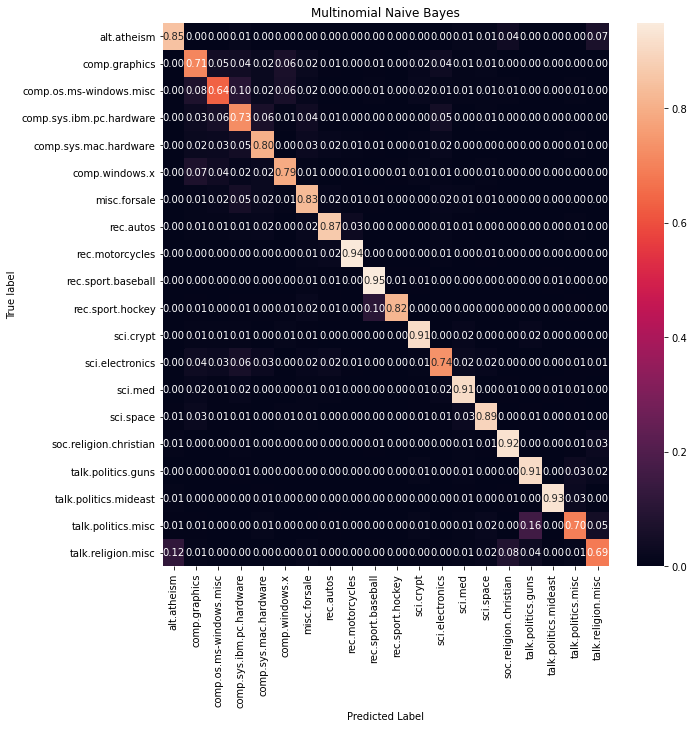

In [39]:
nb_clf, nb_pred = Basis(grid_search_NB, 'Multinomial Naive Bayes')

### Logistic Regression

In [40]:
from sklearn.linear_model import SGDClassifier

In [41]:
logReg_clf = SGDClassifier()
params_logReg = {'loss': ['log']}
grid_search_logReg = GridSearchCV(estimator = logReg_clf, param_grid = params_logReg, verbose = False)

Logistic Regression

--------------------------------------------------------------------------------
train time: 19.885s
test time:  0.086s
accuracy:   0.761
Precision: 0.761
Recall: 0.761
f1_score: 0.761
--------------------------------------------------------------------------------

Logistic Regression Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.82      0.73      0.77       319
           comp.graphics       0.69      0.77      0.73       389
 comp.os.ms-windows.misc       0.73      0.72      0.73       394
comp.sys.ibm.pc.hardware       0.72      0.71      0.72       392
   comp.sys.mac.hardware       0.78      0.81      0.79       385
          comp.windows.x       0.83      0.74      0.79       395
            misc.forsale       0.72      0.85      0.78       390
               rec.autos       0.89      0.87      0.88       395
         rec.motorcycles       0.94      0.94      0.94       398
      rec

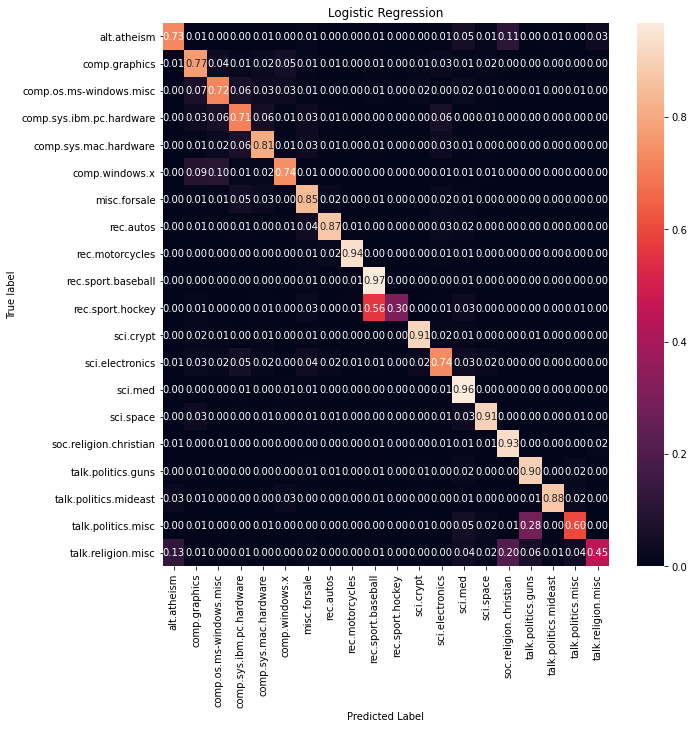

In [42]:
logReg_clf, logReg_pred = Basis(grid_search_logReg, 'Logistic Regression')

### Support Vector Machine

In [43]:
from sklearn.linear_model import SGDClassifier

In [44]:
svm_clf = SGDClassifier()
params_svm = {'penalty': ['l2'], 'alpha': [0.0001]}
grid_search_SVM = GridSearchCV(estimator = svm_clf, param_grid = params_svm, n_jobs = -1)

SVM

--------------------------------------------------------------------------------
train time: 14.167s
test time:  0.101s
accuracy:   0.849
Precision: 0.849
Recall: 0.849
f1_score: 0.849
--------------------------------------------------------------------------------

SVM Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.77      0.81       319
           comp.graphics       0.78      0.78      0.78       389
 comp.os.ms-windows.misc       0.75      0.74      0.75       394
comp.sys.ibm.pc.hardware       0.74      0.75      0.75       392
   comp.sys.mac.hardware       0.82      0.84      0.83       385
          comp.windows.x       0.86      0.79      0.82       395
            misc.forsale       0.80      0.89      0.84       390
               rec.autos       0.91      0.90      0.91       395
         rec.motorcycles       0.96      0.96      0.96       398
      rec.sport.baseball       0.77      

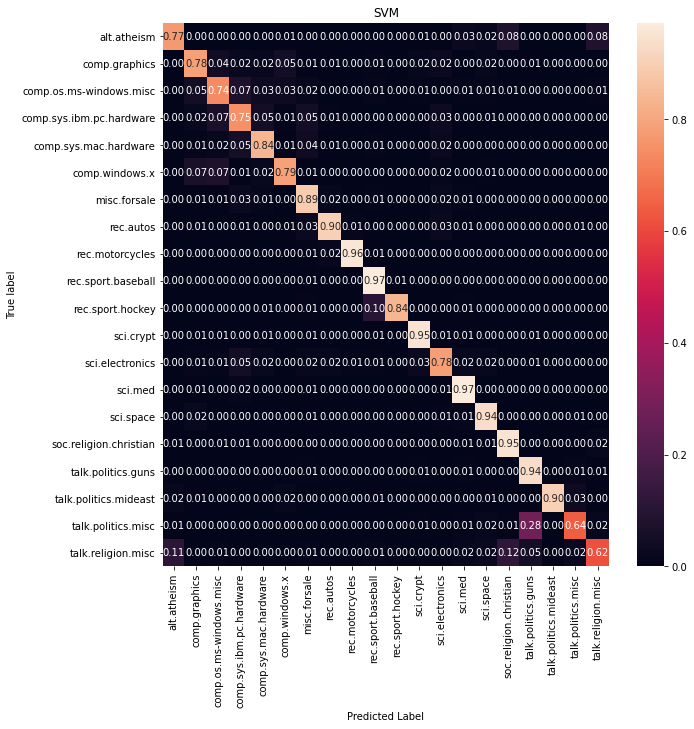

In [45]:
svm_clf, svm_pred = Basis(grid_search_SVM, 'SVM')

### Decision Tree

In [46]:
from sklearn import tree

In [47]:
DT_clf = tree.DecisionTreeClassifier()
grid_search_DT = GridSearchCV(estimator = DT_clf, param_grid = {}, cv = 2)

Decision Tree

--------------------------------------------------------------------------------
train time: 128.974s
test time:  0.034s
accuracy:   0.567
Precision: 0.567
Recall: 0.567
f1_score: 0.567
--------------------------------------------------------------------------------

Decision Tree Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.51      0.46      0.48       319
           comp.graphics       0.45      0.49      0.47       389
 comp.os.ms-windows.misc       0.54      0.55      0.55       394
comp.sys.ibm.pc.hardware       0.42      0.42      0.42       392
   comp.sys.mac.hardware       0.53      0.53      0.53       385
          comp.windows.x       0.54      0.48      0.51       395
            misc.forsale       0.60      0.66      0.63       390
               rec.autos       0.53      0.59      0.56       395
         rec.motorcycles       0.75      0.75      0.75       398
      rec.sport.base

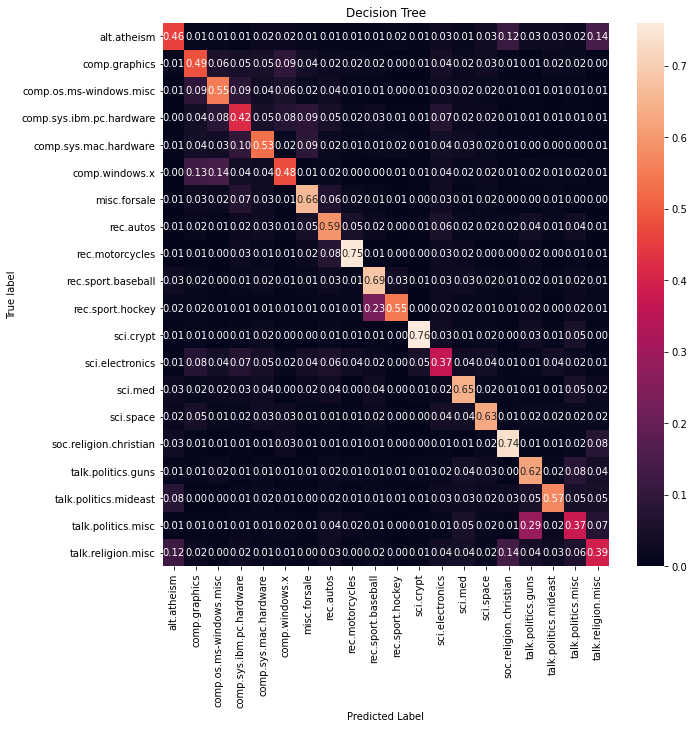

In [48]:
DT_clf, DT_pred = Basis(grid_search_DT, 'Decision Tree')

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf_clf = RandomForestClassifier(n_estimators=100)
grid_search_RF = GridSearchCV(estimator = rf_clf, param_grid = {}, cv = 2)

Random Forest

--------------------------------------------------------------------------------
train time: 284.073s
test time:  1.579s
accuracy:   0.723
Precision: 0.723
Recall: 0.723
f1_score: 0.723
--------------------------------------------------------------------------------

Random Forest Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.81      0.66      0.73       319
           comp.graphics       0.56      0.72      0.63       389
 comp.os.ms-windows.misc       0.67      0.73      0.70       394
comp.sys.ibm.pc.hardware       0.67      0.65      0.66       392
   comp.sys.mac.hardware       0.77      0.75      0.76       385
          comp.windows.x       0.77      0.69      0.73       395
            misc.forsale       0.66      0.92      0.77       390
               rec.autos       0.85      0.82      0.83       395
         rec.motorcycles       0.91      0.92      0.91       398
      rec.sport.base

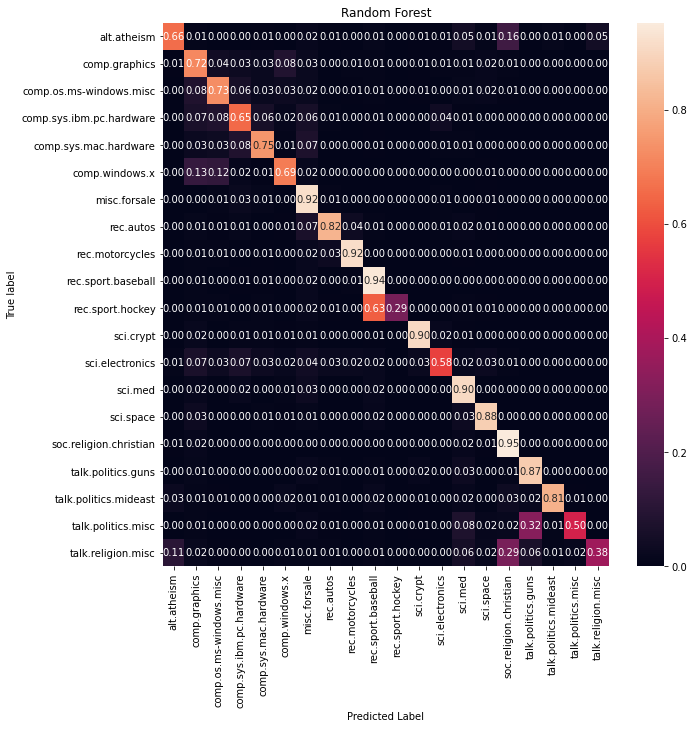

In [51]:
rf_clf, rf_pred = Basis






(grid_search_RF, "Random Forest")

# Summary

In [53]:
summary = pd.DataFrame(reports, columns = ["Classifier", "Train_time", "Test_time", "Accuracy", "Precision", "Recall", "F1"])

In [54]:
summary.set_index('Classifier')
sorted_summary = summary.sort_values(by=['F1', 'Accuracy', 'Precision', 'Recall', 'Train_time', 'Test_time'], ascending = False, ignore_index = True)

In [55]:
sorted_summary

Classifier  Train_time  ...    Recall        F1
0                      SVM   14.166825  ...  0.848989  0.848989
1  Multinomial Naive Bayes    4.676569  ...  0.826955  0.826955
2      Logistic Regression   19.885242  ...  0.760984  0.760984
3            Random Forest  284.073252  ...  0.723360  0.723360
4            Decision Tree  128.974213  ...  0.566808  0.566808

[5 rows x 7 columns]